# Comparing and Contrasting Different Compression Methods


In [1]:
# Imports
from glob import glob
from scipy.io import wavfile
from signal_processing_utilities import process_signal
import time
import os

import zlib
import gzip
import bz2
import lzma

from importlib.util import spec_from_loader, module_from_spec
from importlib.machinery import SourceFileLoader

# Import encode
spec = spec_from_loader("encode", SourceFileLoader("encode", "../.././encode"))
encode = module_from_spec(spec)
spec.loader.exec_module(encode)

# Import decode
spec = spec_from_loader("decode", SourceFileLoader("decode", "../.././decode"))
decode = module_from_spec(spec)
spec.loader.exec_module(decode)

In [2]:
def compare_compression_ratio(file, compressed_file: str, method: str = None):
    """This function prints the compression ratio of two files.

    Args:
        file (numpy.ndarray): This is the array of amplitudes before
                              compression.
        compressed_file (str): This is the compressed representation of
                               the amplitudes after the method of
                               compression has been applied.
        method (str):  This is the string representing the method of
                       compression. Defaults to None.
    """
    percent_compression = (1 - (len(compressed_file) / len(file.tobytes()))) * 100
    if method != None:
        print(f"\nMethod of Compression: {method}")
    else:
        print("\n")
    print(f"Initial file size: {len(file.tobytes())} bytes.")
    print(f"Compressed File Size: {len(compressed_file)} bytes.")
    print(f"Percent of Compression: {percent_compression:.2f}%")
    print(f"\n")

In [3]:
def print_compression_efficiency_metrics_wrapper(
    file: str, compressed_file: str, start_time: int, stop_time: int, method: str
):
    """This is a wrapper function to print the start and stop times as
       well as the ratio of compression.

    Args:
        file (str): This is the array of amplitudes before compression
        compressed_file (str): This is the compressed representation of
                               the amplitudes after the method of
                               compression has been applied.
        start_time (int): This is the initial starting time in
                          nanoseconds.
        stop_time (int): This is the final time in nanoseconds of the
                         chosen method of compression.
        method (str): This is the string representing the
                                method of compression.
    """
    compare_compression_ratio(file=file, compressed_file=compressed_file, method=method)
    process_signal.print_time_each_function_takes_to_complete_processing(
        start_time=start_time, stop_time=stop_time, executed_line=method
    )

In [4]:
data_dir = "../../data"
data_file_list = glob(data_dir + "/*.wav")
current_file = data_file_list[0]
current_file = "../../data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav"

In [5]:
# current_file = "../../data/0ab237b7-fb12-4687-afed-8d1e2070d621.wav"

In [6]:
current_file

'../../data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav'

In [7]:
rate, data = wavfile.read(current_file)

## Brainwire


In [8]:
start_time = time.time_ns()
data_brainwire = encode.compress(current_file)
stop_time = time.time_ns()

print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    file=data,
    compressed_file=data_brainwire,
    method="encode.compress(data)",
)


Method of Compression: encode.compress(data)
Initial file size: 197398 bytes.
Compressed File Size: 88472 bytes.
Percent of Compression: 55.18%



Executed Line: encode.compress(data)...
Time Δ Nanoseconds: 3743630000
Time Δ Microseconds: 3743630.0
Time Δ Milliseconds: 3743.63
Time Δ Seconds: 3.74363




In [9]:
start_time = time.time_ns()
sample_rate, data_brainwire_amplitude = decode.decompress(data_brainwire)
stop_time = time.time_ns()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data_brainwire_amplitude_pd = pd.DataFrame(
    data_brainwire_amplitude, columns=["Amplitude"]
)

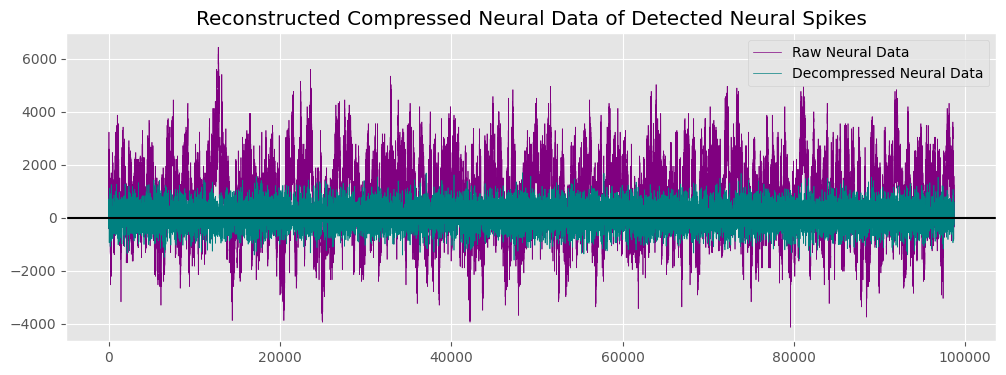

In [12]:
# Plotting the reconstructed neural data the original raw neural data.

plt.figure(figsize=(12, 4))
plt.style.use("ggplot")


plt.title("Reconstructed Compressed Neural Data of Detected Neural Spikes")
plt.plot(data, color="purple", linewidth=0.5, label="Raw Neural Data")
plt.plot(
    data_brainwire_amplitude_pd,
    linewidth=0.5,
    color="teal",
    label="Decompressed Neural Data",
)
plt.grid(True)
plt.legend()
plt.axhline(y=0, color="black")
plt.show()

In [13]:
file_path = os.getcwd() + "/data/test_compression.brainwire"

In [14]:
with open(file_path, "wb+") as fp:
    written_data = fp.write(data_brainwire)
    fp.close()

In [15]:
written_data

88472

## zlib


In [16]:
start_time = time.time_ns()
data_zlib = zlib.compress(data)
stop_time = time.time_ns()

print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    file=data,
    compressed_file=data_zlib,
    method="zlib.compress(data)",
)


Method of Compression: zlib.compress(data)
Initial file size: 197398 bytes.
Compressed File Size: 87243 bytes.
Percent of Compression: 55.80%



Executed Line: zlib.compress(data)...
Time Δ Nanoseconds: 35992000
Time Δ Microseconds: 35992.0
Time Δ Milliseconds: 35.992
Time Δ Seconds: 0.035992




## Gzip


In [17]:
start_time = time.time_ns()
data_gz = gzip.compress(data)
stop_time = time.time_ns()

print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    file=data,
    compressed_file=data_gz,
    method="gzip.compress(data)",
)


Method of Compression: gzip.compress(data)
Initial file size: 197398 bytes.
Compressed File Size: 86176 bytes.
Percent of Compression: 56.34%



Executed Line: gzip.compress(data)...
Time Δ Nanoseconds: 47898000
Time Δ Microseconds: 47898.0
Time Δ Milliseconds: 47.898
Time Δ Seconds: 0.047898




## bz2


In [18]:
start_time = time.time_ns()
data_bz2 = bz2.compress(data)
stop_time = time.time_ns()

print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    file=data,
    compressed_file=data_bz2,
    method="bz2.compress(data)",
)


Method of Compression: bz2.compress(data)
Initial file size: 197398 bytes.
Compressed File Size: 63435 bytes.
Percent of Compression: 67.86%



Executed Line: bz2.compress(data)...
Time Δ Nanoseconds: 14227000
Time Δ Microseconds: 14227.0
Time Δ Milliseconds: 14.227
Time Δ Seconds: 0.014227




## lzma


In [19]:
start_time = time.time_ns()
data_lzma = lzma.compress(data)
stop_time = time.time_ns()

print_compression_efficiency_metrics_wrapper(
    start_time=start_time,
    stop_time=stop_time,
    file=data,
    compressed_file=data_bz2,
    method="lzma.compress(data)",
)


Method of Compression: lzma.compress(data)
Initial file size: 197398 bytes.
Compressed File Size: 63435 bytes.
Percent of Compression: 67.86%



Executed Line: lzma.compress(data)...
Time Δ Nanoseconds: 49969000
Time Δ Microseconds: 49969.0
Time Δ Milliseconds: 49.969
Time Δ Seconds: 0.049969


